# Sommaire

* [Dataframe](#df)
* [Suppression de la ligne "unnamed:0" ](#unnamed)
* [Suppression des duplicats](#duplicats)
* [Suppression des lignes avec valeur nulles](#nulles)
* [Distribution des données](#distribution)
* [Numérisation de la colonne "ocean_proximity"](#num)
* [Heatmap](#heatmap)
* [Exportation du DataFrame en csv pour les prochaines études](#export)

In [2]:
# Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix, classification_report

from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve

from sklearn.model_selection import learning_curve

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.inspection import permutation_importance
import seaborn as sns
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

## Dataframe <a class="anchor" id="df"></a> 

In [3]:
realestate_df = pd.read_csv("C:/Users/Simplon/Desktop/California Dreamin/california housing.csv")
realestate_df

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


## Suppression de la ligne "unnamed:0" <a class="anchor" id="unnamed"></a> 

Nous supprimons cette ligne car elle n'apporte aucun intérêt. Très sûrement l'ID de la base de donnée complète.

In [4]:
realestate_df.drop(realestate_df.columns[0], axis=1, inplace=True)

## Suppression des duplicats <a class="anchor" id="duplicats"></a> 

In [5]:
realestate_df=realestate_df.drop_duplicates(subset=['longitude', 'latitude','households','population'], keep="first")
realestate_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


Aucune ligne n'a été supprimé. Il n'y a donc pas de duplicats.

## Suppression des lignes avec valeur nulles <a class="anchor" id="nulles"></a>  

In [6]:
#Remplacement des valeurs "0" en valeur nulle pour la recherche de valeur nulle dans le DataFrame
realestate_df[['total_bedrooms', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income', 'median_house_value']] = realestate_df[['total_bedrooms', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income', 'median_house_value']].replace(0, np.nan)

In [7]:
realestate_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Il y a donc 176 lignes sur 16512 qui comportent des valeurs négatives. Représentant un ensemble bien trop peu impoortant, nous allons juste les supprimer plutôt que de chercher à remplacer les valeurs nulles

In [8]:
realestate_df=realestate_df.dropna()
estate_df=realestate_df

## Distribution des données <a class="anchor" id="distribution"></a>

Nous allons examiner la répartition des données afin de voir s'il est possible de détecter des clusters à l'intérieur même des données non traitées, ou tout simplement une possibilité de voir des données qui pourraient être corrélée entre elles.

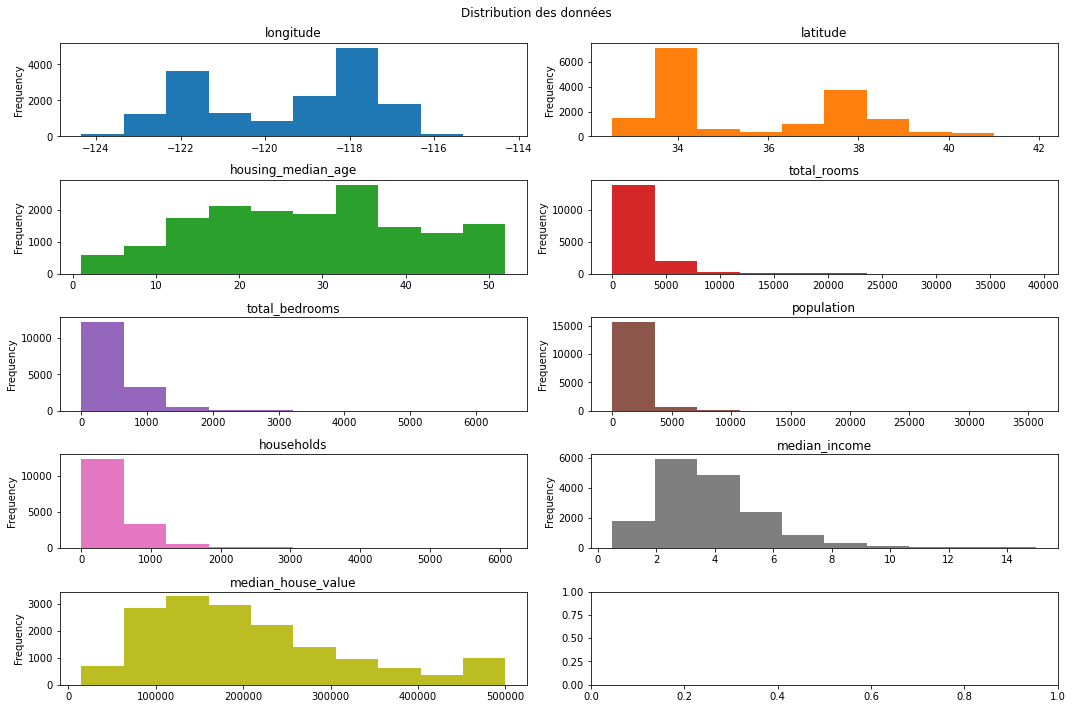

In [9]:
fig, axes = plt.subplots(5, 2, figsize=(15, 10))
axes = axes.flatten()
ax_idx = 0
columns = estate_df.drop('ocean_proximity', axis = 1).columns
for col in columns:
    realestate_df[col].plot(kind = 'hist', ax = axes[ax_idx], title = col, color = next(color_cycle))
    ax_idx += 1

plt.suptitle('Distribution des données')
plt.tight_layout()
plt.show()

On voit ici que les deux features "median_income" et "median_house_value" ont l'air d'agir très similairement.

## Numérisation de la colonne "ocean_proximity" <a class="anchor" id="num"></a> 

Afin de pouvoir mener plus d'observations, nous allons numériser la colonne "ocean_proximity"

In [10]:
#Recherche de toutes las valeurs possibles pour "ocean_proximity" :
estate_df.apply(pd.Series.nunique)

longitude               827
latitude                839
housing_median_age       52
total_rooms            5468
total_bedrooms         1828
population             3645
households             1701
median_income         10804
median_house_value     3674
ocean_proximity           5
dtype: int64

Nous remarquons alors que 'ocean_proximity' contient cinq possibilités différentes. Après recherche manuelle nous trouvons :

    ISLAND
    NEAR OCEAN
    NEAR BAY
    <1H OCEAN
    INLAND
    
Je vais accorder une valeur numérique aux proximités, comme un code :
    
    ISLAND     = 1
    NEAR OCEAN = 2
    NEAR BAY   = 3
    <1H OCEAN  = 4
    INLAND     = 5
    
Il sera ainsi possible d'étudier la colonne "ocean_proximity" une fois ses valeurs numérisés.

In [11]:
#Copie du dataframe :
copy_df = estate_df.copy()

#Suppression des colonnes non-voulues :
copy_df=copy_df.drop(columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value'])

#Changement des valeurs char en valeur numérique
copy_df['ocean_proximity'].replace({'ISLAND': '1', 'NEAR OCEAN': '2', 'NEAR BAY': '3', '<1H OCEAN': '4', 'INLAND': '5'}, inplace=True)
copy_df = pd.to_numeric(copy_df['ocean_proximity'])
copy_df = copy_df.to_frame()

#Changement du nom de la colonne
copy_df=copy_df.rename(columns={'ocean_proximity': 'proximity'})

#Concaténage de la colonne dans le DataFrame principale
estate_df=pd.concat([estate_df,copy_df], axis=1)

Pour éviter que ces valeurs aient un poids, nous devons alors les encoder :

In [12]:
#encoding
one_hot = pd.get_dummies(estate_df['proximity'])
estate_df = estate_df.drop('proximity',axis=1)

estate_df = estate_df.join(one_hot)

In [13]:
#Renommer les colonnes
estate_df=estate_df.rename(columns={1 :'ISLAND', 2:'NEAR OCEAN', 3 :'NEAR BAY', 4 :'<1H OCEAN', 5 :'INLAND'})
estate_df=estate_df.drop(['ocean_proximity'],axis=1)
estate_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ISLAND,NEAR OCEAN,NEAR BAY,<1H OCEAN,INLAND
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0,0,0,0,1
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,0,0,0,1,0
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,0,0,0,0,1
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,0,0,0,1,0
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,0,0,0,0,1
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,0,0,1,0,0
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,0,0,0,0,1
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,0,0,0,1,0


## Heatmap  <a class="anchor" id="heatmap"></a>

In [14]:
realcorr=estate_df.corr()

<AxesSubplot:>

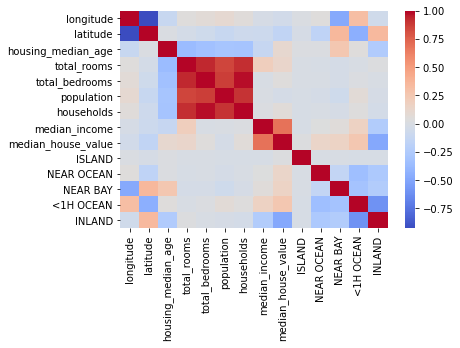

In [15]:
sns.heatmap(realcorr, 
        xticklabels=realcorr.columns,
        yticklabels=realcorr.columns,
        cmap= "coolwarm")

In [16]:
corr_df = realcorr.unstack().reset_index() 

corr_df.columns = ['feature_1','feature_2', 'correlation'] 

corr_df.sort_values(by="correlation",ascending=False, inplace=True) 

corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] 

In [17]:
truecorr_df = corr_df[corr_df['feature_1'] == 'median_house_value']
truecorr_df=(truecorr_df.reset_index(drop=True))
truecorr_df

,feature_1,feature_2,correlation
0,median_house_value,median_income,0.689593
1,median_house_value,<1H OCEAN,0.259971
2,median_house_value,NEAR BAY,0.160470
3,median_house_value,NEAR OCEAN,0.140880
4,median_house_value,total_rooms,0.132570
5,median_house_value,housing_median_age,0.109763
6,median_house_value,households,0.062674
7,median_house_value,total_bedrooms,0.047478
8,median_house_value,ISLAND,0.026780
9,median_house_value,population,-0.028033


Nous pouvons voir quel features sera plus importantes dans les prochaines études. 
On remarque d'ailleurs qu'il existe bel et bien une corrélation entre "median_house_value" et "median_income"


## Exportation du DataFrame en csv pour les prochaines études <a class="anchor" id="export"></a>

In [18]:
estate_df.to_csv(r"C:/Users/Simplon/Desktop/California Dreamin/estate.csv", index = False)

Maintenant que nous avons nettoyé le jeu de données, nous pouvons maintenant trouver un modèle prédictif (dans un autre Notebook).